In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import io
from pandas.plotting import scatter_matrix

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving hotel_bookings.csv to hotel_bookings.csv


In [ ]:
hotel_bookings = pd.read_csv('/content/hotel_bookings.csv')
print(hotel_bookings)

               hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27   
2                    July     

In [ ]:
hotel_bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
hotel_bookings.describe(include = 'all')

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
count,119390,119390.000000,119390.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,...,119390,103050.000000,6797.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390,119390
unique,2,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,...,3,NaN,NaN,NaN,4,NaN,NaN,NaN,3,926
top,City Hotel,NaN,NaN,NaN,August,NaN,NaN,NaN,NaN,NaN,...,No Deposit,NaN,NaN,NaN,Transient,NaN,NaN,NaN,Check-Out,2015-10-21
freq,79330,NaN,NaN,NaN,13877,NaN,NaN,NaN,NaN,NaN,...,104641,NaN,NaN,NaN,89613,NaN,NaN,NaN,75166,1461
mean,NaN,0.370416,104.011416,2016.156554,NaN,27.165173,15.798241,0.927599,2.500302,1.856403,...,NaN,86.693382,189.266735,2.321149,NaN,101.831122,0.062518,0.571363,NaN,NaN
std,NaN,0.482918,106.863097,0.707476,NaN,13.605138,8.780829,0.998613,1.908286,0.579261,...,NaN,110.774548,131.655015,17.594721,NaN,50.535790,0.245291,0.792798,NaN,NaN
min,NaN,0.000000,0.000000,2015.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,...,NaN,1.000000,6.000000,0.000000,NaN,-6.380000,0.000000,0.000000,NaN,NaN
25%,NaN,0.000000,18.000000,2016.000000,NaN,16.000000,8.000000,0.000000,1.000000,2.000000,...,NaN,9.000000,62.000000,0.000000,NaN,69.290000,0.000000,0.000000,NaN,NaN
50%,NaN,0.000000,69.000000,2016.000000,NaN,28.000000,16.000000,1.000000,2.000000,2.000000,...,NaN,14.000000,179.000000,0.000000,NaN,94.575000,0.000000,0.000000,NaN,NaN
75%,NaN,1.000000,160.000000,2017.000000,NaN,38.000000,23.000000,2.000000,3.000000,2.000000,...,NaN,229.000000,270.000000,0.000000,NaN,126.000000,0.000000,1.000000,NaN,NaN


In [ ]:
#copy of a dataframe hotel_bookings
hotel_bookings1 = hotel_bookings.copy()

In [ ]:
hotel_bookings.nunique()

hotel                                2
is_canceled                          2
lead_time                          479
arrival_date_year                    3
arrival_date_month                  12
arrival_date_week_number            53
arrival_date_day_of_month           31
stays_in_weekend_nights             17
stays_in_week_nights                35
adults                              14
children                             5
babies                               5
meal                                 5
country                            177
market_segment                       8
distribution_channel                 5
is_repeated_guest                    2
previous_cancellations              15
previous_bookings_not_canceled      73
reserved_room_type                  10
assigned_room_type                  12
booking_changes                     21
deposit_type                         3
agent                              333
company                            352
days_in_waiting_list     

In [ ]:
hotel_bookings['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [ ]:
hotel_bookings['hotel'].value_counts()

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

In [ ]:
hotel_bookings['is_canceled'].unique()

array([0, 1])

In [ ]:
hotel_bookings['meal'].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [ ]:
hotel_bookings['market_segment'].unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

In [ ]:
hotel_bookings['distribution_channel'].unique()

array(['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS'], dtype=object)

In [ ]:
hotel_bookings[hotel_bookings.duplicated()].shape

(31994, 32)

In [ ]:
hotel_bookings.drop_duplicates(inplace = True)

In [ ]:
hotel_bookings.shape

(87396, 32)

In [ ]:
hotel_bookings['meal'].replace('Undefined','SC', inplace =True)

In [ ]:
hotel_bookings['meal'].unique()

array(['BB', 'FB', 'HB', 'SC'], dtype=object)

**Handling Missing Values**

In [ ]:
hotel_bookings.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             452
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             12193
company                           82137


In [ ]:
hotel_bookings.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             452
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             12193
company                           82137


 **agent, company has 12193 and 82137 null values.
which means the customers booked the hotel by themselves by avoiding agent, company.so, replace those null values with 0.**

In [ ]:
hotel_bookings[['agent','company']] = hotel_bookings[['agent','company']].fillna(0)

In [ ]:
hotel_bookings['country'].fillna('others', inplace = True)

In [ ]:
hotel_bookings['children'].fillna(hotel_bookings['children'].mean(), inplace = True)

In [ ]:
hotel_bookings.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [ ]:
#rows with total number of adults, children or babies equal to zero. So we will remove such rows.
hotel_bookings[hotel_bookings['adults'] + hotel_bookings['children'] + hotel_bookings['babies'] == 0].shape

(166, 32)

In [ ]:
hotel_bookings.drop(hotel_bookings[hotel_bookings['adults'] + hotel_bookings['children'] + hotel_bookings['babies'] == 0 ].index, inplace = True)

In [ ]:
hotel_bookings[['children', 'company', 'agent']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87230 entries, 0 to 119389
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   children  87230 non-null  float64
 1   company   87230 non-null  float64
 2   agent     87230 non-null  float64
dtypes: float64(3)
memory usage: 2.7 MB


**children, company, agent are by default mentioned as float64.convering them into int64 type**

In [ ]:
hotel_bookings[['children', 'company', 'agent']] = hotel_bookings[['children', 'company', 'agent']].astype('int64')

In [ ]:
# changing datatype of column 'reservation_status_date' to data_type.
hotel_bookings['reservation_status_date'] = pd.to_datetime(hotel_bookings['reservation_status_date'], format = '%Y-%m-%d')

In [ ]:
# Adding total staying days in hotels
hotel_bookings['total_stay'] = hotel_bookings['stays_in_weekend_nights']+hotel_bookings['stays_in_week_nights']
# Adding total people num as column, i.e. total people num = num of adults + children + babies
hotel_bookings['total_people'] = hotel_bookings['adults']+hotel_bookings['children']+hotel_bookings['babies']

**Exploratory Data Analysis**

In [ ]:
num_hotel_bookings = hotel_bookings[['lead_time','previous_cancellations','previous_bookings_not_canceled','booking_changes',
                                     'days_in_waiting_list','adr','required_car_parking_spaces','total_of_special_requests',
                                     'total_stay','total_people']]

<Axes: >

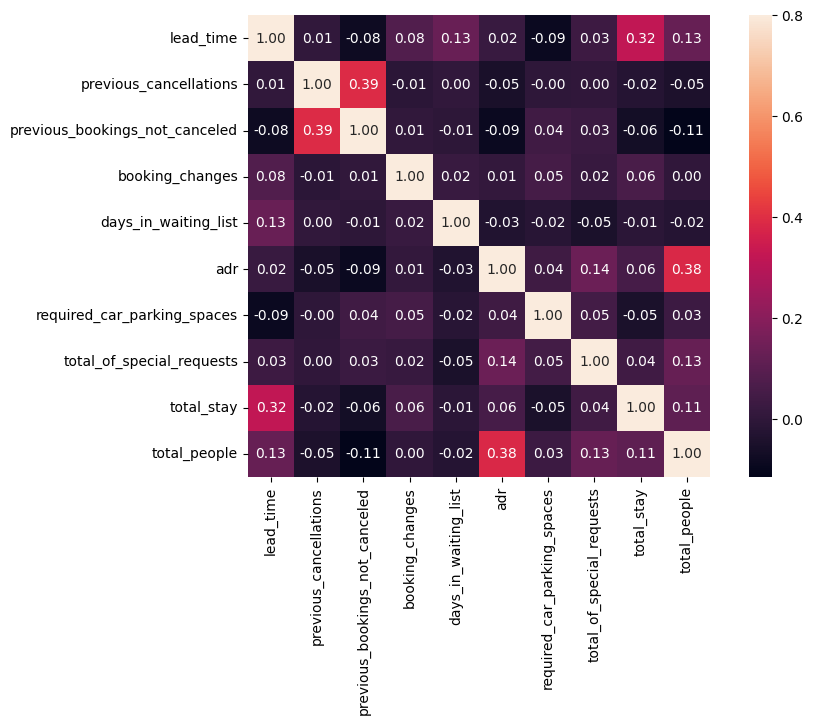

In [ ]:
corrmat = num_hotel_bookings.corr()
f, ax = plt.subplots(figsize = (10, 6))
sns.heatmap(corrmat, annot = True, fmt = '.2f' , annot_kws = {'size' : 10}, vmax = 0.8, square = True)

In [ ]:
corr_matrix = hotel_bookings.corr()
corr_matrix['total_stay'].sort_values(ascending = False)

<ipython-input-52-b2e77c814b3d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = hotel_bookings.corr()


total_stay                        1.000000
stays_in_week_nights              0.949850
stays_in_weekend_nights           0.783927
lead_time                         0.320911
agent                             0.202566
adults                            0.108119
total_people                      0.107087
is_canceled                       0.085451
booking_changes                   0.062378
adr                               0.060477
total_of_special_requests         0.040792
children                          0.033832
arrival_date_week_number          0.031470
babies                            0.017217
arrival_date_year                 0.004773
days_in_waiting_list             -0.010600
previous_cancellations           -0.021636
arrival_date_day_of_month        -0.027696
required_car_parking_spaces      -0.049183
previous_bookings_not_canceled   -0.064974
company                          -0.084190
is_repeated_guest                -0.122385
Name: total_stay, dtype: float64

**scatterplot for average daily rate and total stay**

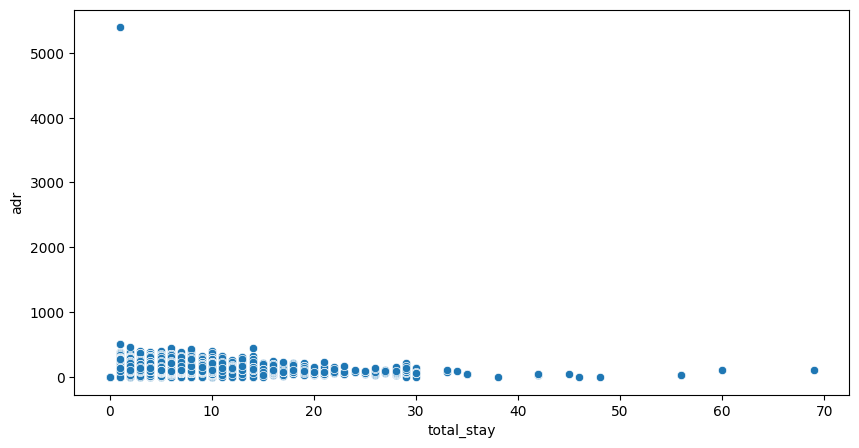

In [ ]:
plt.figure(figsize = (10,5))
sns.scatterplot(y = 'adr', x = 'total_stay', data = hotel_bookings)
plt.show()

In [ ]:
hotel_bookings.drop(hotel_bookings[hotel_bookings['adr']> 5000].index, inplace = True)

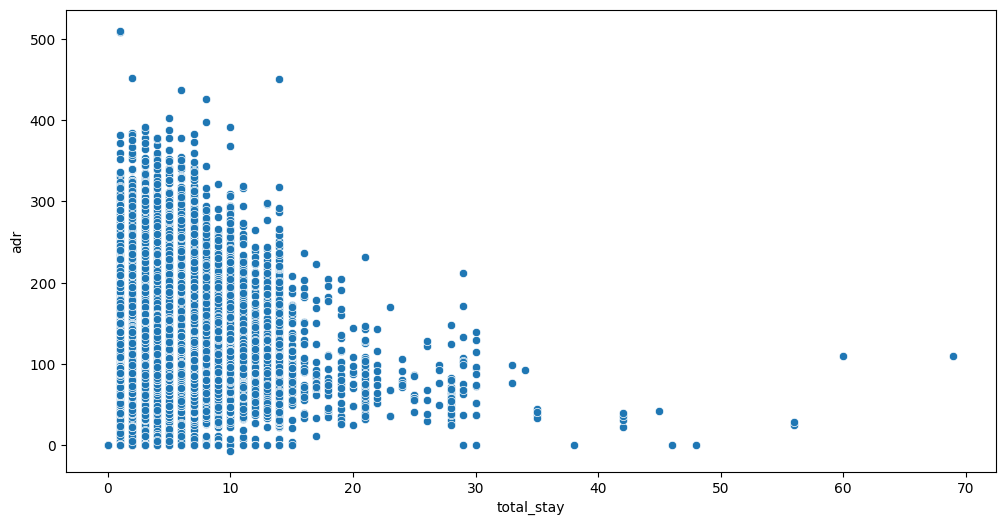

In [ ]:
plt.figure(figsize = (12,6))
sns.scatterplot(y = 'adr', x = 'total_stay', data = hotel_bookings)
plt.show()

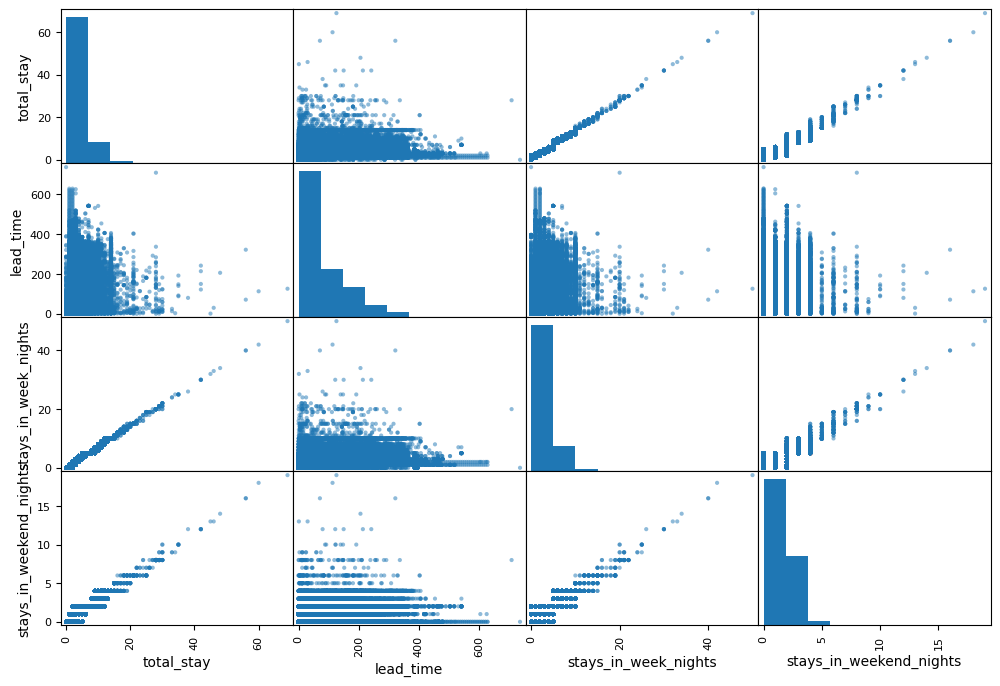

In [ ]:
attributes = ['total_stay', 'lead_time','stays_in_week_nights','stays_in_weekend_nights' ]
scatter_matrix(hotel_bookings[attributes], figsize=(12, 8))
plt.show()

**#1)Which type of hotel do most guest prefer?**

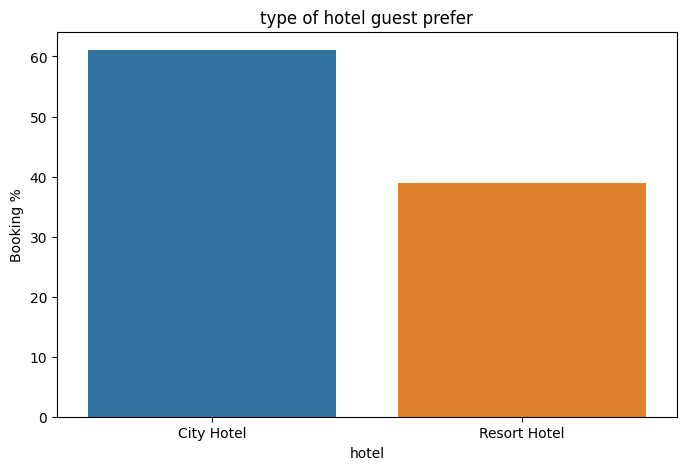

In [ ]:
grouped_by_hotel = hotel_bookings.groupby('hotel')
d1 = pd.DataFrame(((grouped_by_hotel.size()/hotel_bookings.shape[0]) * 100).reset_index().rename(columns = {0 : 'Booking %'}))
plt.figure(figsize = (8, 5)),plt.title('type of hotel guest prefer')
sns.barplot(x = d1['hotel'], y = d1['Booking %'])
plt.show()

**#2)What % of booking is canceled? is there a trend of canceled bookings?**

In [ ]:
# Selecting and counting number of cancelled bookings for each hotel.
cancelled_data = hotel_bookings[hotel_bookings['is_canceled'] == 1]
cancel_grp = cancelled_data.groupby('hotel')
D1 = pd.DataFrame(cancel_grp.size()).rename(columns = {0 : 'total_cancelled_bookings'})

# Counting total number of bookings for each type of hotel
grouped_by_hotel = hotel_bookings.groupby('hotel')
total_booking = grouped_by_hotel.size()
D2 = pd.DataFrame(total_booking).rename(columns = {0 : 'total_bookings'})
D3 = pd.concat([D1, D2], axis = 1)

D3['cancel_%'] = round((D3['total_cancelled_bookings']/D3['total_bookings']) * 100, 2)
D3

,total_cancelled_bookings,total_bookings,cancel_%
hotel,,,
City Hotel,16034,53273,30.10
Resort Hotel,7974,33956,23.48


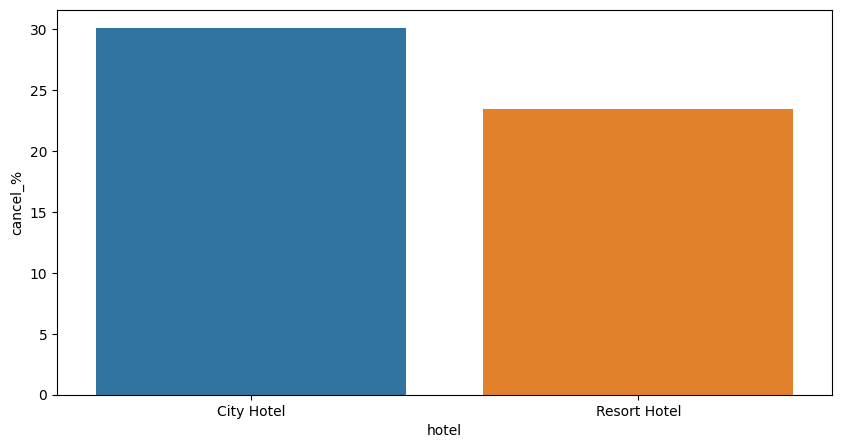

In [ ]:
plt.figure(figsize = (10, 5))
sns.barplot(x = D3.index, y = D3['cancel_%'])
plt.show()

**#3)Top 10 Countries Earned most Revenue from Hotel Bookings?**

In [ ]:
country_wise_guests = hotel_bookings[hotel_bookings['is_canceled' ] == 0]['country'].value_counts().reset_index()
country_wise_guests.columns = ['country', 'number of guests']
country_wise_guests

,country,number of guests
0,PRT,17573
1,GBR,8440
2,FRA,7091
3,ESP,5382
4,DEU,4332
...,...,...
161,ZMB,1
162,SYC,1
163,MDG,1
164,SMR,1


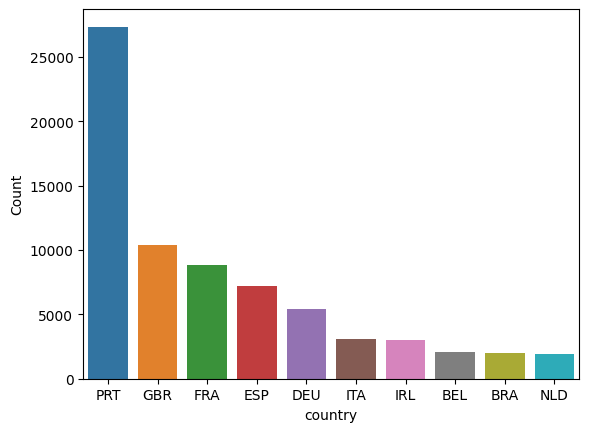

In [ ]:
grouped_by_country = hotel_bookings.groupby('country')
d1 = pd.DataFrame(grouped_by_country.size()).reset_index().rename(columns = {0:'Count'}).sort_values('Count', ascending = False)[:10]
sns.barplot(x = d1['country'], y  = d1['Count'])
plt.show()

**#4)Find any seasonality while booking a hotel**

In [ ]:
busy_months = hotel_bookings['arrival_date_month'].value_counts().reset_index()
busy_months.columns = ['months', 'number of guests']
busy_months

,months,number of guests
0,August,11242
1,July,10043
2,May,8344
3,April,7900
4,June,7756
5,March,7488
6,October,6921
7,September,6682
8,February,6083
9,December,5112


**#5)Which are the marketing segments that are driving hotel booking as a**


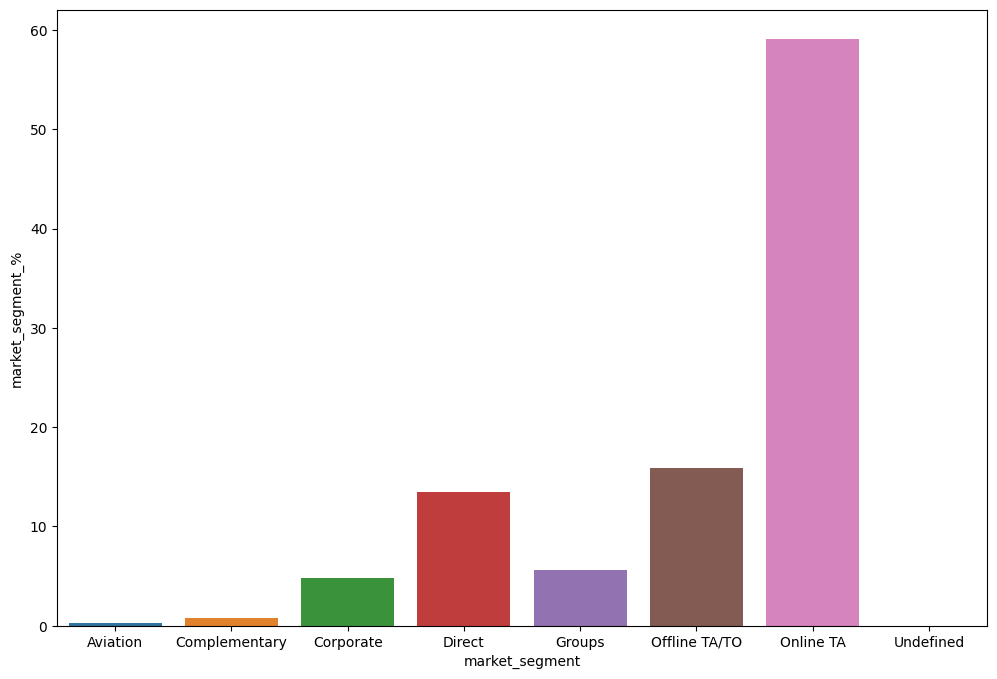

In [ ]:
marketing_segments = hotel_bookings.groupby('market_segment')
d1 = pd.DataFrame((marketing_segments.size()/hotel_bookings.shape[0] * 100).reset_index().rename(columns = {0 : "market_segment_%"}))
plt.figure(figsize = (12, 8))
sns.barplot(x = d1['market_segment'], y = d1['market_segment_%'])
plt.show()

**#6)Different types of meals preferred by customers ?**

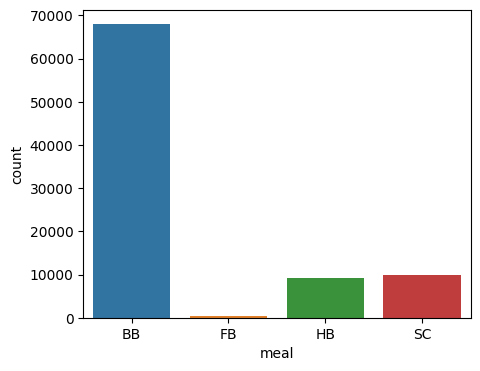

In [ ]:
plt.figure( figsize=(5, 4))
sns.countplot(x = hotel_bookings['meal'])
plt.show()

In [ ]:
hotel_bookings['customer_type'].unique()

array(['Transient', 'Contract', 'Transient-Party', 'Group'], dtype=object)

**#7)Different types of customer who booked hotel ?**

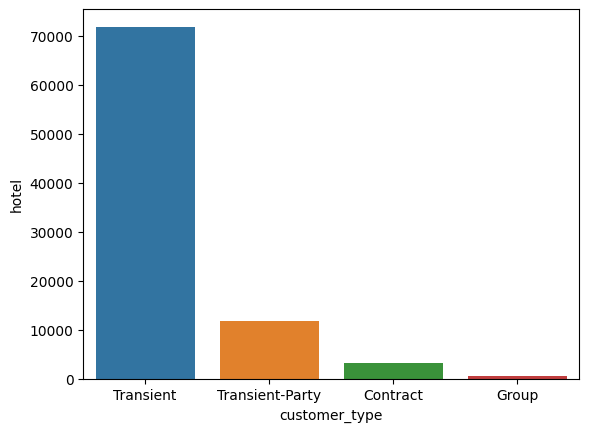

In [ ]:
grouped_by_customer_type = hotel_bookings.groupby('customer_type')
d1 = pd.DataFrame(grouped_by_customer_type.size()).reset_index().rename(columns = {0: 'hotel'}).sort_values('hotel', ascending = False)
sns.barplot(x = d1['customer_type'], y = d1['hotel'])
plt.show()

**#8)How many types of distribution channel of hotel booking ?**

Text(0.5, 1.0, 'Booking % by distribution channels')

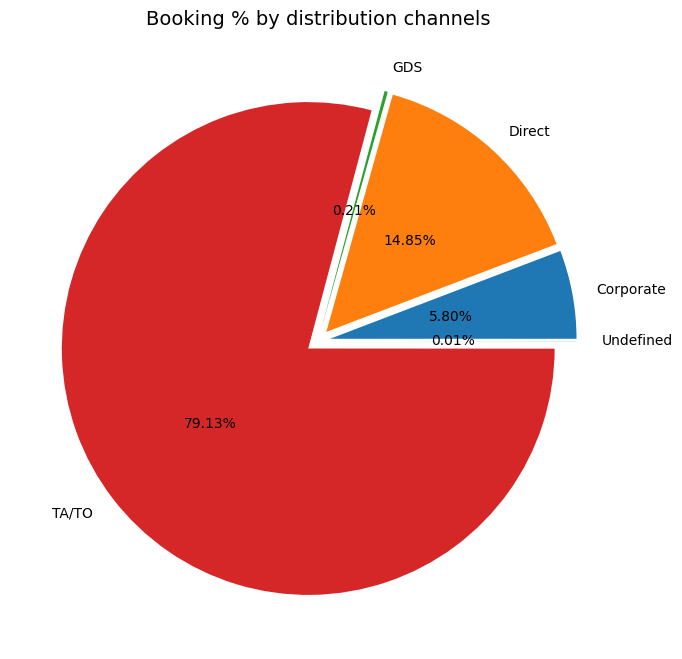

In [ ]:
group_by_distribution = hotel_bookings.groupby('distribution_channel')
d1 = pd.DataFrame(round((group_by_distribution.size()/hotel_bookings.shape[0])* 100, 2)).reset_index().rename(columns = {0: 'Booking_%'})
plt.figure(figsize = (8, 8))

data = d1['Booking_%']
labels = d1['distribution_channel']
plt.pie(x=data, autopct="%.2f%%", explode=[0.05]*5, labels=labels, pctdistance=0.5)
plt.title("Booking % by distribution channels", fontsize=14)

**#9)What is the percentage of repeated guest in hotel? How to convert a 1st-time guest into a multiple-time guest?**

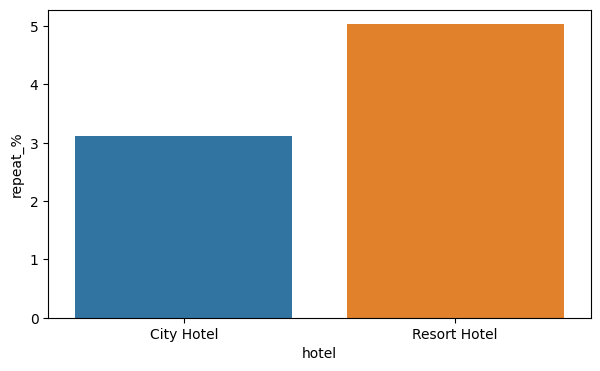

In [ ]:
# Selecting and counting repeated customers bookings
repeated_guests = hotel_bookings[hotel_bookings['is_repeated_guest'] == 1]
repeat_grp = repeated_guests.groupby('hotel')
D1 = pd.DataFrame(repeat_grp.size()).rename(columns = {0 : 'total_repeated_guests'})

# Counting total bookings
total_booking = grouped_by_hotel.size()
D2 = pd.DataFrame(total_booking).rename(columns = {0 : 'total_bookings'})
D3 = pd.concat([D1,D2], axis = 1)

D3['repeat_%'] = round((D3['total_repeated_guests']/D3['total_bookings'])*100, 2)
plt.figure(figsize = (7,4))
sns.barplot(x = D3.index, y = D3['repeat_%'])
plt.show()

**#10)What is the percentage of guest who required car parking spaces ?**

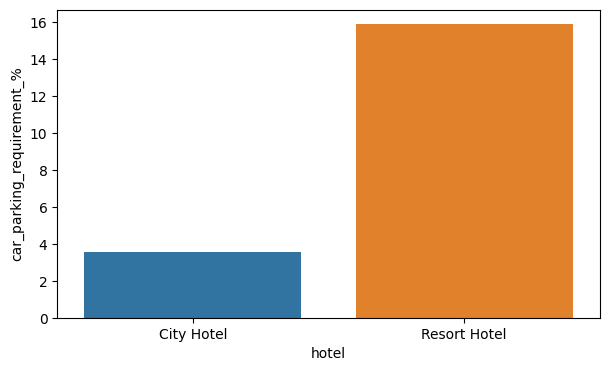

In [ ]:
car_parking_space = hotel_bookings[hotel_bookings['required_car_parking_spaces'] == 1]
parking_space = car_parking_space.groupby('hotel')
D1 = pd.DataFrame(parking_space.size()).rename(columns = {0 : 'guests_who_require_parking_spaces'})

total_booking = grouped_by_hotel.size()
D2 = pd.DataFrame(total_booking).rename(columns = {0 : 'total_bookings'})
D3 = pd.concat([D1, D2], axis = 1)

D3['car_parking_requirement_%'] = round((D3['guests_who_require_parking_spaces']/D3['total_bookings'])*100, 2)
plt.figure(figsize = (7,4))
sns.barplot(x = D3.index, y = D3['car_parking_requirement_%'])
plt.show()